In [26]:
import pandas as pd
import numpy as np


In [27]:
# Create time series DataFrame
date_range = pd.date_range('2023-01-01', periods=50, freq='D')
values = np.random.randint(10, 100, size=50).astype(float)

# Add missing weekends (more realistic pattern)
weekend_mask = pd.to_datetime(date_range).weekday >= 5
values[weekend_mask] = np.nan

# Add some random missing values
additional_missing = np.random.choice(50, 8, replace=False)
values[additional_missing] = np.nan

df = pd.DataFrame({'value': values}, index=date_range)

In [28]:
df['rolling_mean_4_min_1'] = df['value'].fillna(df['value'].rolling(4, min_periods=1).mean())
df['rolling_mean_4_min_2'] = df['value'].fillna(df['value'].rolling(4, min_periods=2).mean())
df['linear_limited_2'] = df['value'].interpolate(method='linear',limit=2)
df['cubic_limited_2'] = df['value'].interpolate(method='cubic', limit=2)
df['spline_limited_2'] = df['value'].interpolate(method='spline', order=3, limit=2)
df['ffill_2'] = df['value'].ffill(limit=2)

<Axes: >

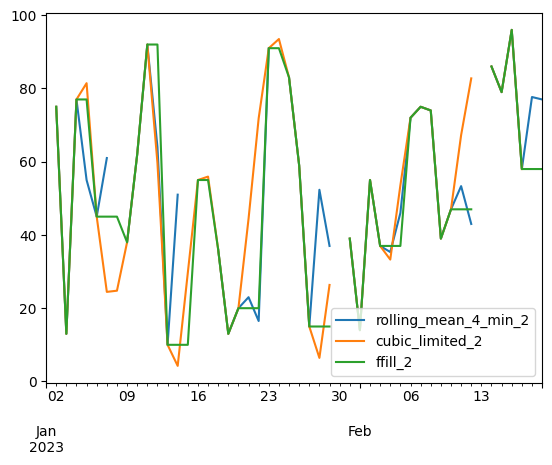

In [33]:
df[['rolling_mean_4_min_2','cubic_limited_2','ffill_2']].plot()